In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from scipy.stats.stats import pearsonr


In [16]:
f = pd.read_csv('C:\\Users\\Palash\\Python Programming Course\\IMDB-Movie-Data.csv')

In [17]:
f.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [18]:
print(f.shape)

(1000, 12)


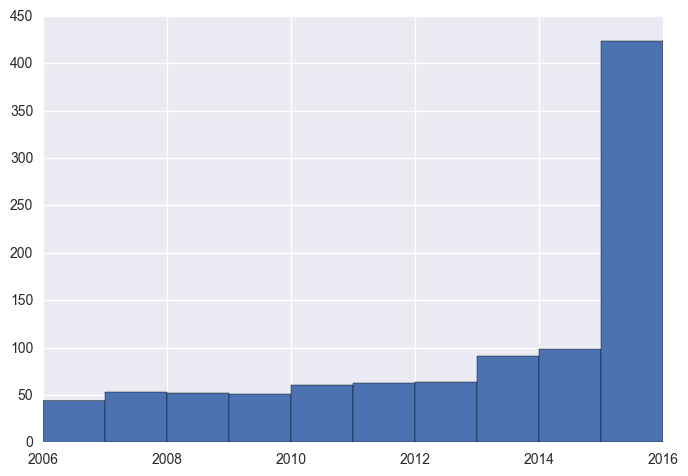

In [19]:
plt.hist(f.Year)
plt.show()


In [20]:
f.Year.value_counts(normalize = True)

2016    0.297
2015    0.127
2014    0.098
2013    0.091
2012    0.064
2011    0.063
2010    0.060
2007    0.053
2008    0.052
2009    0.051
2006    0.044
Name: Year, dtype: float64

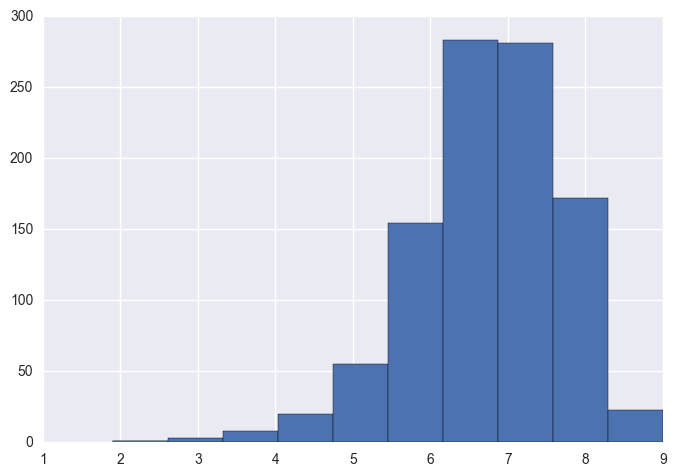

In [21]:
plt.hist(f.Rating)
plt.show()

In [22]:
f.Rating.value_counts(normalize = True).head(10)

7.1    0.052
6.7    0.048
7.0    0.046
6.3    0.044
6.6    0.042
7.3    0.042
7.2    0.042
6.5    0.040
7.8    0.040
6.8    0.037
Name: Rating, dtype: float64

In [23]:
f.Rating.describe()

count    1000.000000
mean        6.723200
std         0.945429
min         1.900000
25%         6.200000
50%         6.800000
75%         7.400000
max         9.000000
Name: Rating, dtype: float64

In [24]:
f[f.Rating == 1.9]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
829,830,Disaster Movie,Comedy,"Over the course of one evening, an unsuspectin...",Jason Friedberg,"Carmen Electra, Vanessa Lachey,Nicole Parker, ...",2008,87,1.9,77207,14.17,15.0


In [25]:
f[f.Rating == 9.0]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
54,55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0


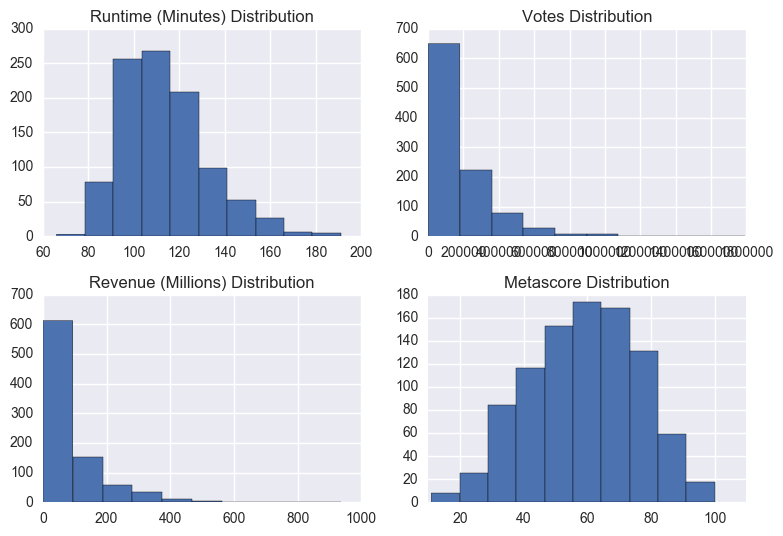

In [26]:
def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=10,ax=ax)
        ax.set_title(var_name+" Distribution")
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()
    
f_col = ['Runtime (Minutes)', 'Votes', 'Revenue (Millions)', 'Metascore']
    
draw_histograms(f, f_col, 2, 2)   

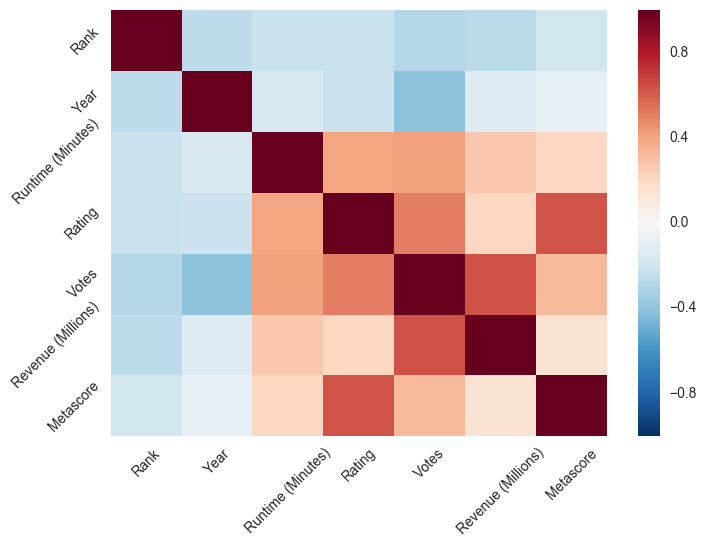

In [27]:
f_corr = f.corr()
sns.heatmap(f_corr)
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()



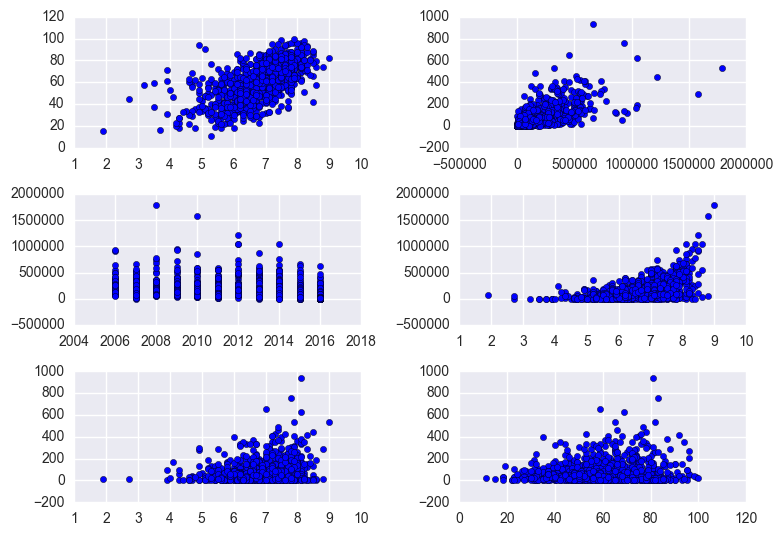

In [28]:
fig = plt.figure()
fig.add_subplot(321)
plt.scatter(f.Rating, f.Metascore,)
fig.add_subplot(322)
plt.scatter(f.Votes, f['Revenue (Millions)'])
fig.add_subplot(323)
plt.scatter(f.Year, f.Votes)
fig.add_subplot(324)
plt.scatter(f.Rating, f.Votes)
fig.add_subplot(325)
plt.scatter(f.Rating, f['Revenue (Millions)'])
fig.add_subplot(326)
plt.scatter(f.Metascore, f['Revenue (Millions)'])
fig.tight_layout()
plt.show()

In [29]:
f.Genre.value_counts()[:10].plot.pie(autopct='%1.1f%%',figsize=(10,10))
plt.title('TOP 10 GENRE OF MOVIES')

In [30]:
action = f['Genre'].str.contains('Action').fillna(False)
print('The total number of movies with action :')
len(f[action])

The total number of movies with action :


303

In [31]:
f[action].Year.value_counts().plot(kind = 'barh', fig = (5,5))
plt.title('MOVIES WITH ACTION RELEASED YEAR')

In [32]:
lower_revenue = f[drama].query('(Revenue (Millions) > 0) & (Revenue (Millions) <= 300)')
print ( 'total number of lower revenue drama movies:')
len(lower_revenue)

NameError: name 'drama' is not defined

In [ ]:
sns.jointplot(x="Rating", y="Metascore", data=f[action]);
plt.title('(MOVIES WITH ACTION) RATING AND METASCORE')

In [33]:
f[drama].Year.value_counts().plot(kind='barh',figsize=(5,5))
plt.title('MOVIES WITH DRAMA RELEASED YEAR')

NameError: name 'drama' is not defined

In [34]:
sns.regplot(x = 'Rating', y = 'Metascore', data = f, color = 'Green')

In [35]:
sns.heat

AttributeError: module 'seaborn' has no attribute 'heat'

In [36]:
plt.figure(figsize = (8, 4))
sns.boxplot(x = 'Rating', y = 'Metascore',  data = f)
xt = plt.xticks(rotation=45)

In [37]:
plt.figure(figsize = (8, 4))
sns.countplot(x = 'Genre', data = f)
xt = plt.xticks(rotation=45)